FIS/IG

In [18]:
import pandas as pd

url = "sample_data/breast.csv"
dataframe = pd.read_csv(url)
print(dataframe.head(30))

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          M       17.990         10.38          122.80     1001.0   
1          M       20.570         17.77          132.90     1326.0   
2          M       19.690         21.25          130.00     1203.0   
3          M       11.420         20.38           77.58      386.1   
4          M       20.290         14.34          135.10     1297.0   
5          M       12.450         15.70           82.57      477.1   
6          M       18.250         19.98          119.60     1040.0   
7          M       13.710         20.83           90.20      577.9   
8          M       13.000         21.82           87.50      519.8   
9          M       12.460         24.04           83.97      475.9   
10         M       16.020         23.24          102.70      797.8   
11         M       15.780         17.89          103.60      781.0   
12         M       19.170         24.80          132.40     1123.0   
13         M       1

In [19]:
attr_names = dataframe.columns.to_list()

variables = list(dataframe.select_dtypes(include=['float64']).columns.values)
class_ob = list(dataframe.select_dtypes(exclude=['float64']).columns.values)

for col in variables:
  mean_value=dataframe[col].mean()
  dataframe[col].fillna(value=mean_value, inplace=True)

print(variables)
print(class_ob)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
['diagnosis']


In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.manifold import Isomap
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import math
import numpy as np

X= dataframe.iloc[:, 2:]
components = math.floor(len(X. columns) * 0.85)
X = X.to_numpy()
#Y = Isomap(n_neighbors = 10, n_components = components).fit_transform(X)
y = np.random.choice([0, 1], size=len(X), p=[.1, .9])

# define the pipeline
steps = [('iso', Isomap(n_components = components)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("The number of columns after Intrinsic Estimation is " , components)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

The number of columns after Intrinsic Estimation is  24
Accuracy: 0.883 (0.015)


In [21]:
import math

def calc_entropy(dataframe):
  class_names = dataframe[class_ob[0]].unique()
  #print(classes)
  class_counts = dataframe[class_ob[0]].value_counts()
  #print(classes)

  class_probability = []
  for i in class_names:
    class_probability.append(class_counts[i]/len(dataframe))
  #print(class_probability)

  entropy = 0
  for i in class_probability:
    entropy = entropy + i * math.log(i,2)
  #entropy = -entropy
  #print(entropy)
  return -entropy


entropy = calc_entropy(dataframe)
print(f"Entropy: {entropy}")

Entropy: 0.9526351224018599


In [22]:
class_info = {}
for attr in variables:
  unique_vals = dataframe[attr].unique()

  class_entropy = 0

  for val in unique_vals:
    df = dataframe[dataframe[attr]==val]
    attr_entropy = calc_entropy(df)
    attr_entropy = (attr_entropy)*(len(df)/len(dataframe))
    class_entropy = class_entropy + attr_entropy
  class_info[attr] = class_entropy
  print(f"Entropy of Attribute ({attr}): {class_info[attr]}")

Entropy of Attribute (radius_mean): 0.09185353691826086
Entropy of Attribute (texture_mean): 0.11692324255356915
Entropy of Attribute (perimeter_mean): 0.025931260987985004
Entropy of Attribute (area_mean): 0.024604569420035145
Entropy of Attribute (smoothness_mean): 0.1764562882142497
Entropy of Attribute (compactness_mean): 0.04350595343086726
Entropy of Attribute (concavity_mean): 0.017574692442882248
Entropy of Attribute (concave points_mean): 0.01054481546572935
Entropy of Attribute (symmetry_mean): 0.21759848423220585
Entropy of Attribute (fractal_dimension_mean): 0.11645810633829602
Entropy of Attribute (radius_se): 0.018901384010832103
Entropy of Attribute (texture_se): 0.0883385984296844
Entropy of Attribute (perimeter_se): 0.021089630931458696
Entropy of Attribute (area_se): 0.02725795255593486
Entropy of Attribute (smoothness_se): 0.017574692442882248
Entropy of Attribute (compactness_se): 0.029446199476561453
Entropy of Attribute (concavity_se): 0.024604569420035145
Entropy

In [23]:
#print(class_info)
info_gain = {}
print(f"Information Gain of each column is given below:\n\n")
for i in variables:
  info_gain[i] = entropy - class_info[i]
  print(f"{i}: {info_gain[i]}\n")

Information Gain of each column is given below:


radius_mean: 0.8607815854835991

texture_mean: 0.8357118798482908

perimeter_mean: 0.9267038614138748

area_mean: 0.9280305529818247

smoothness_mean: 0.7761788341876101

compactness_mean: 0.9091291689709926

concavity_mean: 0.9350604299589776

concave points_mean: 0.9420903069361305

symmetry_mean: 0.735036638169654

fractal_dimension_mean: 0.8361770160635639

radius_se: 0.9337337383910278

texture_se: 0.8642965239721755

perimeter_se: 0.9315454914704012

area_se: 0.925377169845925

smoothness_se: 0.9350604299589776

compactness_se: 0.9231889229252984

concavity_se: 0.9280305529818247

concave points_se: 0.8585933385629725

symmetry_se: 0.8181371874054084

fractal_dimension_se: 0.9174857375160954

radius_worst: 0.9003074642106167

texture_worst: 0.8634349686194988

perimeter_worst: 0.8985843535052632

area_worst: 0.9350604299589776

smoothness_worst: 0.7197189097252679

compactness_worst: 0.9183472928687721

concavity_worst: 0.93021879

In [24]:
#Fisher Score Calculation
#Si=∑nj(μij−μi)2 / (∑nj∗ρ2ij)
#where μij and ρij are the mean and the variance of the i-th feature in the j-th class, respectively
#nj is the number of instances in the j-th class and μi is the mean of the i-th feature.
import numpy as np

fisher_scores = {}
classes = dataframe[class_ob[0]].unique()
#print(classes)

for i in variables:
  numerator = 0
  denominator = 0
  mu_i = np.mean(dataframe[i])
  for j in classes:
    temp = dataframe[dataframe[class_ob[0]]==j]
    mu_ij = np.mean(temp[i])
    var_ij = np.var(temp[i])
    nj = len(temp)

    numerator = numerator + (nj*((mu_ij - mu_i)**2))
    denominator = nj * (var_ij ** 2)
    if denominator == 0:
      denominator = 0.01;

  fisher_scores[i] = numerator/denominator

print("The Fisher Scores of the Attributes are given below:\n\n")
for i in variables:
  print(f"{i}: {fisher_scores[i]}\n")

The Fisher Scores of the Attributes are given below:


radius_mean: 1.0536606443520848

texture_mean: 0.020027433081128632

perimeter_mean: 0.026805350675210098

area_mean: 0.000306284639462658

smoothness_mean: 1244.7535123203338

compactness_mean: 1223.9718030476465

concavity_mean: 1384.4301048373015

concave points_mean: 22683.31976450461

symmetry_mean: 346.84014602754553

fractal_dimension_mean: 6.341724175447017

radius_se: 246.45784930704062

texture_se: 0.000278583248295998

perimeter_se: 5.719881499066681

area_se: 0.16270893600624772

smoothness_se: 738.2664767162498

compactness_se: 616.198765119203

concavity_se: 79.93298540677323

concave points_se: 9550.178967935593

symmetry_se: 1.9384115791694283

fractal_dimension_se: 913.8289521720432

radius_worst: 1.4620579149538313

texture_worst: 0.01384986419040738

perimeter_worst: 0.033072838086170064

area_worst: 0.0003898725016117291

smoothness_worst: 923.53718091023

compactness_worst: 191.6026034081363

concavity_worst: 7

In [25]:
threshhold = int(input("Enter the threshhold value: "))
IG_arr = []
FS_arr = []
for i in variables:
  IG_arr.append(info_gain[i])
  FS_arr.append(fisher_scores[i])

IG_arr = np.array(IG_arr)
FS_arr = np.array(FS_arr)


temp = np.argpartition(IG_arr,threshhold)
redundant_attrs = []
for i in range(1,threshhold+1):
  redundant_attrs.append(variables[temp[-i]])

temp = np.argpartition(FS_arr,threshhold)
for i in range(threshhold):
  redundant_attrs.append(variables[temp[i]])

redundant_attrs = set(redundant_attrs)
print(f"The redundant atrributes are: {redundant_attrs}\n")

dataframe = dataframe.drop(list(redundant_attrs), axis=1)
variables = list(dataframe.select_dtypes(include=['float64']).columns.values)
display(dataframe)

Enter the threshhold value: 1
The redundant atrributes are: {'fractal_dimension_worst', 'texture_se'}



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


HC

In [26]:
data = dataframe.select_dtypes(exclude=['object']).to_numpy()
data = data.transpose()
data

array([[ 17.99  ,  20.57  ,  19.69  , ...,  16.6   ,  20.6   ,   7.76  ],
       [ 10.38  ,  17.77  ,  21.25  , ...,  28.08  ,  29.33  ,  24.54  ],
       [122.8   , 132.9   , 130.    , ..., 108.3   , 140.1   ,  47.92  ],
       ...,
       [  0.7119,   0.2416,   0.4504, ...,   0.3403,   0.9387,   0.    ],
       [  0.2654,   0.186 ,   0.243 , ...,   0.1418,   0.265 ,   0.    ],
       [  0.4601,   0.275 ,   0.3613, ...,   0.2218,   0.4087,   0.2871]])

In [27]:
CovMat = np.cov(data, bias=True)
CovMat

array([[ 1.23970943e+01,  4.89895664e+00,  8.52969709e+01,
         1.22233142e+03,  8.43960138e-03,  9.40315084e-02,
         1.89793439e-01,  1.12277445e-01,  1.42480883e-02,
        -7.74007939e-03,  6.62483980e-01,  4.79510764e+00,
         1.17760836e+02, -2.35119690e-03,  1.29776662e-02,
         2.06225207e-02,  8.16518773e-03, -3.03364079e-03,
        -3.96926044e-04,  1.64847270e+01,  6.42179404e+00,
         1.14087712e+02,  1.88490872e+03,  9.60771016e-03,
         2.28846306e-01,  3.86705620e-01,  1.72089764e-01,
         3.56829359e-02],
       [ 4.89895664e+00,  1.84663974e+01,  3.43792323e+01,
         4.85139668e+02, -1.41229234e-03,  5.36723123e-02,
         1.03510108e-01,  4.88908513e-02,  8.40407974e-03,
        -2.31707887e-03,  3.28459120e-01,  2.44514394e+00,
         5.07515139e+01,  8.52597993e-05,  1.47606117e-02,
         1.85712342e-02,  4.34073750e-03,  3.23936643e-04,
         6.18683406e-04,  7.31638604e+00,  2.40677756e+01,
         5.16549913e+01,  8.39

In [28]:
MIC_arr = np.empty((len(CovMat), len(CovMat)))
for i in range(len(CovMat)):
  for j in range(len(CovMat)):
    Rho = CovMat[i][j]/math.sqrt(CovMat[i][i] * CovMat[j][j])
    MIC_arr[i][j] = CovMat[i][i] + CovMat[j][j] - math.sqrt(pow((CovMat[i][i] + CovMat[j][j]), 2) - (4 * CovMat[i][i] * CovMat[j][j] * (1 - pow(Rho,2))))

# for checking unique values in matrix
MIC_unique = list(set(i for j in MIC_arr for i in j))
MIC_unique.sort()
MIC_unique = MIC_unique[1:]
print(MIC_arr)
#print(MIC_unique)

[[0.00000000e+00 1.93380613e+01 1.04059530e-01 6.22913391e-01
  3.83413071e-04 4.14188152e-03 6.87525652e-03 9.72210877e-04
  1.46769117e-03 8.98572162e-05 8.24935355e-02 3.78393118e+00
  1.13313279e+01 1.71066975e-05 6.13106996e-04 1.75057785e-03
  6.52551946e-05 1.34940904e-04 1.39533553e-05 9.84770266e-01
  2.17222323e+01 1.68144779e+00 2.83546152e+00 1.02591475e-03
  4.09596936e-02 6.27088172e-02 3.84783843e-03 7.43623716e-03]
 [1.93380613e+01 0.00000000e+00 3.28073727e+01 3.31246603e+01
  3.94688123e-04 5.25653100e-03 1.15273802e-02 2.74712728e-03
  1.49279429e-03 9.89407560e-05 1.41804852e-01 7.35293649e+00
  3.44181660e+01 1.79977531e-05 6.16681143e-04 1.78183854e-03
  7.39703322e-05 1.36414246e-04 1.39373168e-05 2.63691010e+01
  4.33682221e+00 3.21298383e+01 3.25736260e+01 1.03455519e-03
  4.56029241e-02 7.90042053e-02 7.87382219e-03 7.55743353e-03]
 [1.04059530e-01 3.28073727e+01 0.00000000e+00 3.14511423e+01
  3.77937386e-04 3.84131746e-03 6.18099839e-03 8.29175787e-04
  1.45

In [29]:
threshhold = int(input("Enter the threshhold value: "))
redundant_attrs = []
print(variables)

for i in range(threshhold):
  rem_val = MIC_unique[i]
  solutions = np.argwhere(MIC_arr == rem_val)
  print(solutions[0][1])
  redundant_attrs.append(variables[solutions[i][1]-1])

redundant_attrs = set(redundant_attrs)
print(f"The redundant atrributes are: {redundant_attrs}\n")

dataframe = dataframe.drop(list(redundant_attrs), axis=1)
variables = list(dataframe.select_dtypes(include=['float64']).columns.values)
display(dataframe)

Enter the threshhold value: 1
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']
18
The redundant atrributes are: {'symmetry_se'}



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


PCA

In [30]:
from sklearn.preprocessing import StandardScaler

x = dataframe.loc[:, variables].values
y = dataframe.loc[:, class_ob[0]].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083


In [31]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)

In [32]:
explained_variance = pca.explained_variance_ratio_
explained_variance

#np.array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

array([4.83192069e-01, 1.86717529e-01, 8.61047440e-02, 6.51493936e-02,
       5.22872593e-02, 3.28315794e-02, 2.00707325e-02, 1.44351370e-02,
       1.41792270e-02, 1.03890836e-02, 8.81732187e-03, 5.53552392e-03,
       4.85856845e-03, 3.37028905e-03, 2.34523908e-03, 2.02380063e-03,
       1.84715719e-03, 1.70336068e-03, 1.17820739e-03, 9.12468886e-04,
       7.15370233e-04, 6.63735925e-04, 3.09217624e-04, 2.67780122e-04,
       6.07622892e-05, 2.94977121e-05, 4.94520765e-06])

In [33]:
x_pca['Class']=y
#x_pca.columns = ['PC1','PC2','PC3','PC4','Class']
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Class
0,8.928906,2.071546,-0.351988,3.701904,-1.260846,-1.776460,-1.980660,-0.858014,-0.026654,-0.406492,...,0.398951,0.092577,-0.274907,0.067272,-0.238044,0.208258,-0.035285,0.058049,-0.048237,M
1,2.535593,-3.634447,0.329106,0.812720,-0.946802,0.165148,0.668110,0.062256,-0.974379,0.668495,...,-0.164793,-0.200351,-0.041399,-0.061481,-0.003983,-0.164288,0.050846,-0.011205,-0.000803,M
2,5.792114,-0.705463,-0.346599,0.709548,-0.433231,-0.216268,0.705733,0.356415,-0.152980,-0.406247,...,-0.019302,-0.095548,0.258467,-0.000951,0.011234,-0.054836,0.041660,0.001189,0.000548,M
3,6.053159,9.020396,-4.157564,1.299645,0.379106,-1.921048,-1.234590,-0.603710,-0.643587,-0.670548,...,-0.188964,-0.146876,0.352741,-0.051632,-0.225184,-0.229760,0.056605,-0.064315,-0.020466,M
4,4.115594,-1.411084,2.493489,2.057819,-0.568559,1.164796,1.067285,-0.441122,-0.428744,0.431710,...,0.038257,0.123984,0.009975,0.023237,0.026933,-0.005301,-0.036510,-0.002944,0.021923,M


array(['M', 'B'], dtype=object)

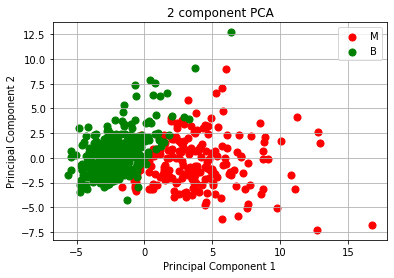

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = x_pca.Class.unique()
colors = ['red', 'green', 'blue', 'yellow', 'brown', 'black',]
for target, color in zip(targets,colors):
 indicesToKeep = x_pca['Class'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 0]
 , x_pca.loc[indicesToKeep, 1]
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()
targets